## Fbs markers, frequency and GO analyses 

In [1]:
import sys 
import os
from datetime import datetime

import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
#import scvi
import hdf5plugin
import matplotlib.pyplot as plt
import seaborn as sns

# Add repo path to sys path (allows to access scripts and metadata from repo)
repo_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/FB_Vascular_compartment'
sys.path.insert(1, repo_path) 
sys.path.insert(2, '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts')


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

In [2]:
# Define plot and path dirs
plot_path = os.path.join(repo_path, 'plots')
data_path = os.path.join(repo_path, 'data')
results_path = os.path.join(repo_path, 'results')
model_path = os.path.join(repo_path, 'models')
general_data_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/data'

In [3]:
# Formatting
from matplotlib import font_manager
font_manager.fontManager.addfont("/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf")
#plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

# Import custom scripts
from utils import get_latest_version,update_obs,freq_by_donor
from anno_levels import get_ct_levels, get_ct_palette, age_group_levels, age_group_palette
from plotting.utils import plot_grouped_boxplot, calc_figsize

In [4]:
sc.settings.set_figure_params(dpi = 80, color_map = 'RdPu', vector_friendly = True, format = 'pdf')

In [5]:
plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

sc.settings.set_figure_params(dpi = 100, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'pdf')

## Load adata

In [7]:
adata = ad.read_h5ad(f'{data_path}/objects/thyAgeing_scvi_v3_2024-11-05_tec-fb-vascSplit_FB_v2_2layers_300epochs_batch-sample2025-01-16.zarr')

In [8]:
# Add final annotations to adata and remove non-annotated cells
ct_anno = pd.read_csv(f'{general_data_path}/objects/rna/thyAgeing_all_scvi_v4_2025-02-04_curatedAnno_v10.csv', index_col = 0)

for c in ct_anno.columns:
    if c in adata.obs.columns:
        adata.obs.drop(c, axis = 1, inplace = True)
adata.obs = adata.obs.join(ct_anno)

adata = adata[~adata.obs['taa_l5'].isnull(),].copy()

In [9]:
# Update metadata
latest_meta_path = get_latest_version(dir = f'{general_data_path}/metadata', file_prefix='Thymus_ageing_metadata')
latest_meta = pd.read_excel(latest_meta_path)

update_obs(adata, latest_meta, on = 'index')


Latest file: Thymus_ageing_metadata_v28_2025-03-13.xlsx
No columns specified to update. Automatically determining columns to update...
Updating columns: ['age', 'age_cont', 'age_group', 'age_group2', 'age_months', 'age_num', 'age_unit', 'chemistry_detail', 'chemistry_orig', 'chemistry_simple', 'cite', 'comment', 'donor', 'health_status', 'in_HTSA', 'library', 'library_bcr', 'library_tcr_ab', 'library_tcr_gd', 'origin_institute', 'path_bcr', 'path_cellbender_gex', 'path_cellranger_arc', 'path_raw_gex', 'path_tcr_ab', 'path_tcr_gd', 'public_data', 'research_no', 'sample', 'sex', 'sort', 'sort_type', 'starsolo_version', 'study', 'type']
On columns: index


### Load cell type levels

In [7]:
# Define columns
col_cell_type_broad = 'taa_l3'
col_cell_type_fine = 'taa_l4'
fbs_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1='Fb')
fbs_fine_ctypes = get_ct_levels(col_cell_type_broad, taa_l1='Fb')
col_age_group = 'age_group'
col_age_group_levels = eval(f'{col_age_group}_levels')

Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v11_2025-08-29_levels.xlsx


In [ ]:
fbs_broad_ctypes
fbs_broad_ctypes
col_age_group_levels

['Fb-interlo', 'Fb-interm', 'Fb-adipo', 'Fb-perilo', 'Fb-med']

['Fb-interlo_PI16',
 'Fb-interlo',
 'Fb-interm',
 'Fb-adipo',
 'Fb-perilo',
 'Fb-perilo_COLEC11',
 'Fb-med']

['infant', 'paed', 'adult', 'aged']

In [ ]:
sc.pl.umap(adata, color = 'taa_l5', size = 5, legend_fontsize=8,frameon = False, return_fig = True, title = '').savefig(f'{plot_path}/thyAgeing_fbs_taa_l5_umap.pdf', bbox_inches='tight')

In [ ]:
sc.pl.umap(adata, color = 'taa_l5', size = 5, legend_fontsize=8,frameon = False, return_fig = True, title = '').savefig(f'{plot_path}/thyAgeing_fbs_taa_l5_umap.png', bbox_inches='tight')

In [ ]:
sc.pl.umap(adata, color = 'age_group', groups = ['infant', 'paed'], size = 5, legend_fontsize=8,
           frameon = False, return_fig = True, title = '').savefig(f'{plot_path}/thyAgeing_fbs_paed_age_group_umap.png', bbox_inches='tight')

In [ ]:
sc.pl.umap(adata, color = 'age_group', groups = ['adult'], size = 5, legend_fontsize=8,
           frameon = False, return_fig = True, title = '').savefig(f'{plot_path}/thyAgeing_fbs_adult_age_group_umap.png', bbox_inches='tight')

In [ ]:
sc.pl.umap(adata, color = 'age_group', groups = ['aged'], size = 5, legend_fontsize=8,
           frameon = False, return_fig = True, title = '').savefig(f'{plot_path}/thyAgeing_fbs_aged_age_group_umap.png', bbox_inches='tight')

In [18]:
fbs_mrkrs_full_filt = {'General': ['PDGFRA', 'VIM', 'DCN', 'PDPN', 'THY1'],
             'Interlobular\n(PI16 progenitor)': ['MFAP5', 'CD55', 'FBN1','SEMA3C', 'PI16','PCOLCE2'],
            'PI16 aged': ['ALDH1A3', 'HAS1'],
             'Intermediate': ['PTX3', 'FOSL1', 'TNFRSF12A', 'HMOX1', 'IL1RL1', 'HMGA1','MT1X'],
            'Adipose': ['PPARG','PPP1R1A', 'PLIN1', 'LIPE'],
             'Perilobular': ['COL15A1', 'COLEC11', 'ALDH1A2', 'PTN', 'HAND2', 'LAMC3'],
             'Medullary\n(antigen-presenting)': ['HLA-DRA',  'CD74', 'FRZB', 'CCL19', 'CCL21', 'IL33'],
             }
fbs_mrkrs_full_lst=[]
[fbs_mrkrs_full_lst.extend(fbs_mrkrs_full_filt[key]) for key in fbs_mrkrs_full_filt.keys()]

[None, None, None, None, None, None, None]

In [19]:
from plotting.utils import plot_grouped_boxplot,thyAgeing_colors

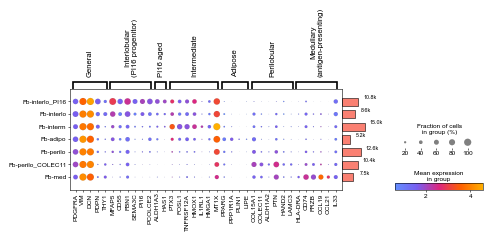

In [26]:
sc.pl.DotPlot(adata, 
            categories_order=fbs_fine_ctypes,
            groupby = 'taa_l5',
            var_names=fbs_mrkrs_full_filt,
            figsize = calc_figsize(width = 170, height = 40),
            mean_only_expressed=True,
            cmap = sns.blend_palette([thyAgeing_colors['blue'], thyAgeing_colors['purple'], thyAgeing_colors['magenta'], thyAgeing_colors['orange'], thyAgeing_colors['yellow']], as_cmap=True,), #'magma',
            ).style(smallest_dot=0, largest_dot = 40, dot_edge_lw=0.05).add_totals(size = 0.5).savefig(f'{plot_path}/thyAgeing_fbs_taa-l5_fbs_Markers_dotplot.pdf') 

In [63]:
plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')


###

 ## Calculate frequency changes

In [14]:
get_ct_levels('taa_l1')

Latest file: thyAgeing_full_curatedAnno_v9_2025-03-03_levels.xlsx


['T',
 'NK',
 'TEC',
 'Fb',
 'EC',
 'Mural',
 'B',
 'Myeloid_dev',
 'Neutrophil',
 'Mono',
 'Mac',
 'DC',
 'Mast']

In [ ]:
# Load columns
col_cell_type_broad = 'taa_l3'
col_cell_type_fine = 'taa_l4'
stroma_broad_ctypes = get_ct_levels(col_cell_type_broad, taa_l1=['Fb', 'EC', 'Mural'])
stroma_fine_ctypes = get_ct_levels(col_cell_type_fine, taa_l1=['Fb', 'EC', 'Mural'])
col_age_group = 'age_group'
col_age_group_levels = eval(f'{col_age_group}_levels')

Latest file: thyAgeing_full_curatedAnno_v9_2025-03-03_levels.xlsx
Latest file: thyAgeing_full_curatedAnno_v9_2025-03-03_levels.xlsx


In [16]:
sample_cnts = adata.obs['sample'].value_counts()
filtered_samples = sample_cnts[sample_cnts>100].index.tolist()
# Create anno df
anno_df = adata.obs[['sample', 'donor', 'sex', 'sort', 'study', col_age_group, 'age_months' ,col_cell_type_broad, col_cell_type_fine]].copy()
anno_df_filt = anno_df[(anno_df['sample'].isin(filtered_samples))].copy()
anno_df_filt.head()


,sample,donor,sex,sort,study,age_group,age_months,taa_l3,taa_l4
A43_TH_TOT_5GEX_1-CAGCGACGTGTTCGAT,A43_TH_TOT_5GEX_1,A43,M,TOT,Park2020,adult,420,Fb-interlo,Fb-interlo
GSM4466786-GACTCTCAGCGACCCT,baut7,baut_adult1,F,CD45N,Bautista2021,adult,300,Fb-perilo,Fb-perilo
TA9453199-ATCTGCCCATCAGTCA,A53-THY--SC-EPCP-1 G,A53,F,EPCAM,Thymus_ageing,adult,348,Fb-perilo,Fb-perilo
A43_TH_45NM_5GEX_2-ACTGATGTCCAAGCCG,A43_TH_45NM_5GEX_2,A43,M,CD45N,Park2020,adult,420,Fb-med,Fb-med
A43_TH_45NM_5GEX_2-TTCCCAGGTTCCACTC,A43_TH_45NM_5GEX_2,A43,M,CD45N,Park2020,adult,420,Fb-med,Fb-med


In [17]:
freq_df_fine = freq_by_donor(anno_df_filt, sample_col = 'sample', 
                             donor_col = 'donor', summary_col=col_cell_type_fine, 
                             add_meta = [col_age_group])

freq_df_broad = freq_by_donor(anno_df_filt, sample_col = 'sample', 
                             donor_col = 'donor', summary_col=col_cell_type_broad, 
                             add_meta = [col_age_group])

In [26]:
from plotting.utils import plot_grouped_boxplot,thyAgeing_colors,thyAgeing_greys,get_tint_palette

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

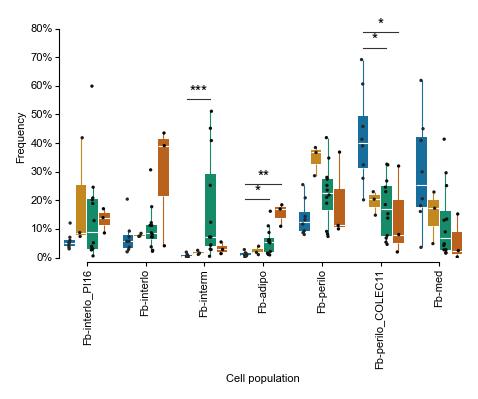

In [23]:
plot_grouped_boxplot(data = freq_df_fine, x = col_cell_type_fine, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_fine_ctypes if c in freq_df_fine[col_cell_type_fine].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (3,2.5),
                     save_stats = f'{results_path}/thyAgeing_Fbs_{col_cell_type_fine}_freq_LM_style')

plt.savefig(f'{plot_path}/thyAgeing_Fbs_{col_cell_type_fine}_freq_LM_style_boxplot.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

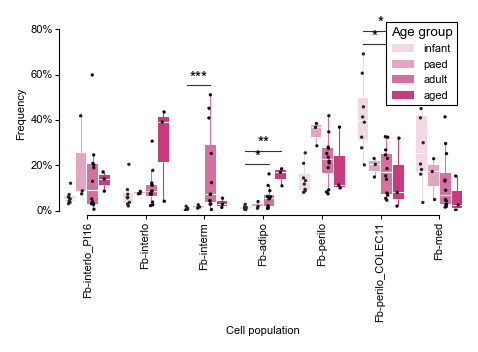

In [30]:
plot_grouped_boxplot(data = freq_df_fine, x = col_cell_type_fine, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_fine_ctypes if c in freq_df_fine[col_cell_type_fine].unique().tolist()], 
                     hue_order = col_age_group_levels, x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (3,2.2), palette  = get_tint_palette(thyAgeing_colors['magenta']), 
                     remove_legend = False)

plt.savefig(f'{plot_path}/thyAgeing_Fbs_{col_cell_type_fine}_freq_LM_style_boxplot_pink.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

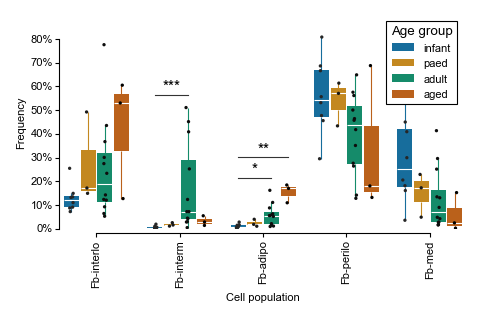

In [33]:
plot_grouped_boxplot(data = freq_df_broad, x = col_cell_type_broad, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_broad_ctypes if c in freq_df_broad[col_cell_type_broad].unique().tolist()], 
                     hue_order = col_age_group_levels, 
                     x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (3,2), remove_legend = False,
                     save_stats = f'{results_path}/thyAgeing_Fbs_{col_cell_type_broad}_freq_LM_style')

plt.savefig(f'{plot_path}/thyAgeing_Fbs_{col_cell_type_broad}_freq_LM_style_boxplot_pres.pdf')

Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


<Axes: xlabel='Cell population', ylabel='Frequency'>

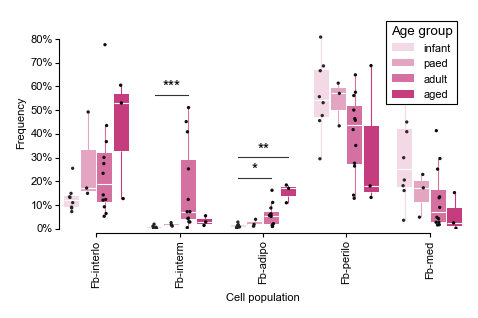

In [34]:
plot_grouped_boxplot(data = freq_df_broad, x = col_cell_type_broad, y = 'mean_prop', hue = col_age_group, 
                     order = [c for c in stroma_broad_ctypes if c in freq_df_broad[col_cell_type_broad].unique().tolist()], 
                     hue_order = col_age_group_levels, 
                     x_label = 'Cell population', y_label = 'Frequency', 
                     legend_title = 'Age group', add_stats = True, format_percent = True, 
                     figsize = (3,2), remove_legend = False,
                     palette= get_tint_palette(thyAgeing_colors['magenta']))

plt.savefig(f'{plot_path}/thyAgeing_Fbs_{col_cell_type_broad}_freq_LM_style_boxplot_pink.pdf')

## Load GO enrichment results

In [11]:
enrich_df = pd.read_csv( f'{data_path}/thyAgeing_Fbs_v2_2layers_300epochs_batch-sample_mrkrs_enrich2.csv', index_col = 0)

In [12]:
fb_enrich = enrich_df.loc[((enrich_df.term_size > 10) & (enrich_df.term_size < 500))].reset_index(drop = True)
fb_enrich['term_occurence'] = fb_enrich['native'].map(fb_enrich['native'].value_counts())
fb_enrich['term_occurence'].max()

np.int64(6)

In [ ]:
import ast
def generate_GO_sim_mtx (enrich_table, population):
    # Filter relevant terms
    enrich_res = enrich_table.loc[
        (enrich_table['query'] == population) & 
        (enrich_table['term_occurence'] <= 2)
    ]
    # Precompute term → gene set mapping
    term_to_genes = {
        row['name']: set(ast.literal_eval(row['intersections'])) 
        for _, row in enrich_res.iterrows()
    }
    terms = list(term_to_genes.keys())
    # Initialize similarity matrix
    sim_mtx = pd.DataFrame(index=terms, columns=terms, dtype='float64')
    # Compute Jaccard similarity
    for term_x in terms:
        genes_x = term_to_genes[term_x]
        for term_y in terms:
            genes_y = term_to_genes[term_y]
            union = genes_x | genes_y
            inter = genes_x & genes_y
            sim_mtx.loc[term_x, term_y] = len(inter) / len(union) if union else 0.0
    return(sim_mtx)



In [29]:
fb_interm_mtx = generate_GO_sim_mtx(enrich_table=fb_enrich, population='Fb-interm')
fb_adipo_mtx = generate_GO_sim_mtx(enrich_table=fb_enrich, population='Fb-adipo')

In [35]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage,fcluster, dendrogram


In [96]:
def cluster_sim_mtx (sim_mtx, threshold, enrich_table, population, fig_dim, select_rep = 'p-value', 
                     save_path = False, **kwargs):
    # Step 1: Convert similarity to distance (Jaccard distance = 1 - similarity)
    dist_mtx = 1 - sim_mtx

    # Step 2: Condense the distance matrix for linkage (squareform expects a distance matrix)
    # Ensure it's symmetric with zeros on the diagonal
    np.fill_diagonal(dist_mtx.values, 0)
    condensed_dist = squareform(dist_mtx.values)

    # Step 3: Hierarchical clustering (you can change 'average' to 'complete', 'ward', etc.)
    Z = linkage(condensed_dist, method='average')
    clusters = fcluster(Z, t=threshold, criterion='distance')

    # Map term name to cluster label
    term_to_cluster = dict(zip(sim_mtx.index, clusters))
    print(np.max(clusters))
    
    # Add cluster label to enrich_res
    enrich_res = enrich_table.loc[
        (enrich_table['query'] == population) & 
        (enrich_table['term_occurence'] <= 2)
    ]
    enrich_res['cluster'] = enrich_res['name'].map(term_to_cluster)

    # Select representative GO terms
    if select_rep == 'p-value':
        representatives = (enrich_res.loc[enrich_res.groupby('cluster')['p_value'].idxmin()].set_index('name'))
    elif select_rep == 'intersection_size': 
        representatives = (enrich_res.loc[enrich_res.groupby('cluster')['intersection_size'].idxmax()].set_index('name'))
    else:
        representatives = None
    
    if representatives is not None:
        # Create subset similarity matrix with only representative terms
        rep_term_names = list(representatives.index)
        print(rep_term_names)
        rep_sim_mtx = sim_mtx.loc[rep_term_names, rep_term_names]

        # Convert to distance matrix
        rep_dist_mtx = 1 - rep_sim_mtx
        np.fill_diagonal(rep_dist_mtx.values, 0)
        rep_condensed_dist = squareform(rep_dist_mtx.values)

        # Linkage for representative terms
        Z_rep = linkage(rep_condensed_dist, method='average')
        fontsize = 8
        # Re-plot dendrogram
        plt.figure(figsize=fig_dim)
        dendrogram(Z_rep,
        labels=rep_sim_mtx.index.tolist(),
       # leaf_rotation=90,
        leaf_font_size=fontsize, 
        link_color_func=lambda k: 'black', **kwargs)
        # Optional: Color representative terms in bold
        '''
        ax = plt.gca()
        for lbl in ax.get_xmajorticklabels():
            term = lbl.get_text()
            if term in rep_terms:
                lbl.set_fontweight('bold')
                lbl.set_color('black')  # Or a standout color
        '''
        plt.title(f"Dendrogram of {population} GO term clusters", fontsize=fontsize)
        plt.xlabel("Clustered Terms", fontsize=fontsize)
        plt.ylabel("1 - Jaccard Similarity",fontsize=fontsize)
        plt.tight_layout()
        if save_path: 
            plt.savefig(save_path, bbox_inches = 'tight')
        plt.show() 


    

## Fb-Adipo

18
['acute inflammatory response', 'cellular response to cAMP', 'response to fatty acid', 'Regulation of lipolysis in adipocytes', 'Triglyceride catabolism', 'regulation of inflammatory response', 'PPAR signaling pathway', 'cellular response to metal ion', 'lipid localization', 'response to nutrient', 'carboxylic acid transport', 'carboxylic acid biosynthetic process', 'Metabolism of vitamins and cofactors', 'peroxisome proliferator activated receptor signaling pathway', 'regulation of small molecule metabolic process', 'AMPK signaling pathway', 'osteoblast differentiation', 'alcohol metabolic process']


/tmp/ipykernel_1934441/1636496714.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrich_res['cluster'] = enrich_res['name'].map(term_to_cluster)


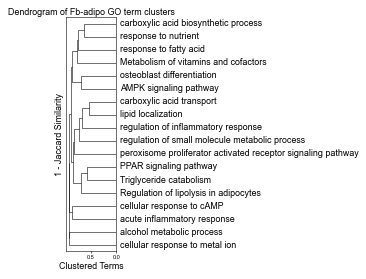

In [108]:
population = 'Fb-adipo'
cluster_sim_mtx(sim_mtx = fb_adipo_mtx, threshold=0.7, population='Fb-adipo', enrich_table=fb_enrich, fig_dim=(4,3.5), 
                select_rep='intersection_size', orientation = 'left', leaf_rotation = 0, 
                save_path = f'{plot_path}/Dendrogram_left_{population}_GO_rep_terms2.pdf')

## Fb-Intermediate

24
['ribosome biogenesis', 'Ribosome biogenesis in eukaryotes', 'ribosomal large subunit biogenesis', 'response to toxic substance', 'NFE2L2 regulating anti-oxidant/detoxification enzymes', 'Ferroptosis', 'cellular response to leukemia inhibitory factor', 'Metabolism of nucleotides', 'nucleoside phosphate biosynthetic process', 'mucopolysaccharide metabolic process', 'regulation of extracellular matrix organization', 'response to hyperoxia', 'multi-organism reproductive process', 'wound healing', 'regulation of homotypic cell-cell adhesion', 'regulation of apoptotic signaling pathway', 'positive regulation of nitric-oxide synthase biosynthetic process', 'Cytokine-cytokine receptor interaction', 'Malaria', 'myeloid leukocyte activation', 'regulation of astrocyte differentiation', 'response to hydrogen peroxide', 'HIF-1 signaling pathway', 'NGF-stimulated transcription']


/tmp/ipykernel_1934441/1636496714.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrich_res['cluster'] = enrich_res['name'].map(term_to_cluster)


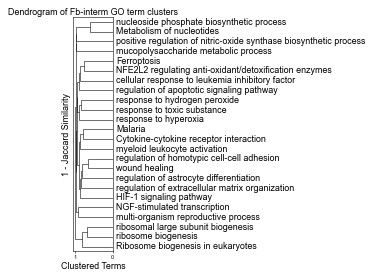

In [105]:
cluster_sim_mtx(sim_mtx = fb_interm_mtx, threshold=0.7, population='Fb-interm', enrich_table=fb_enrich, fig_dim=(4.0,3.5),
                select_rep= 'intersection_size',  orientation = 'left',  leaf_rotation = 0, 
                save_path = f'{plot_path}/Dendrogram_left_{population}_GO_rep_terms2.pdf')